<h1>Dispersion Entropy<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dispersion-Entropy" data-toc-modified-id="Dispersion-Entropy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dispersion Entropy</a></span></li><li><span><a href="#EEG-Sample-Signal" data-toc-modified-id="EEG-Sample-Signal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EEG Sample Signal</a></span></li><li><span><a href="#Dispersion-Entropy" data-toc-modified-id="Dispersion-Entropy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dispersion Entropy</a></span><ul class="toc-item"><li><span><a href="#embeding-diamension-=2" data-toc-modified-id="embeding-diamension-=2-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>embeding diamension =2</a></span><ul class="toc-item"><li><span><a href="#Probability-of-all-the-patterns-found" data-toc-modified-id="Probability-of-all-the-patterns-found-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Probability of all the patterns found</a></span></li><li><span><a href="#Pattern-dictionary" data-toc-modified-id="Pattern-dictionary-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Pattern dictionary</a></span></li><li><span><a href="#top-10-patterns" data-toc-modified-id="top-10-patterns-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>top 10 patterns</a></span></li></ul></li><li><span><a href="#embedding-diamension-4" data-toc-modified-id="embedding-diamension-4-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>embedding diamension 4</a></span><ul class="toc-item"><li><span><a href="#top-10,-non-constant-pattern" data-toc-modified-id="top-10,-non-constant-pattern-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>top-10, non-constant pattern</a></span></li></ul></li></ul></li><li><span><a href="#Dispersion-Entropy-with-sliding-window" data-toc-modified-id="Dispersion-Entropy-with-sliding-window-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dispersion Entropy with sliding window</a></span></li><li><span><a href="#Dispersion-Entropy-multiscale" data-toc-modified-id="Dispersion-Entropy-multiscale-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Dispersion Entropy multiscale</a></span></li><li><span><a href="#Dispersion-Entropy-multiscale-refined" data-toc-modified-id="Dispersion-Entropy-multiscale-refined-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dispersion Entropy multiscale-refined</a></span></li><li><span><a href="#Documentation" data-toc-modified-id="Documentation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Documentation</a></span></li></ul></div>

# Dispersion Entropy 
**Backgorund**
Unlike usual entropy, Dispersion Entropy take the temporal dependency into accounts, same as Sample Entropy and Aproximate Entropy. It is Embeding Based Entropy function. The idea of Dispersion is almost same as Sample and Aproximate, which is to extract Embeddings, estimate their distribuation and compute entropy. However, there is a fine detail that make dispersion entropy more usuful.
1. First, is to map the distribuation original signal to uniform (using CDF), then divide them into n-classes. This is same as done for quantization process of any normally distributed signal, such as speech. In quantization, this mapping helps to minimize the quantization error, by assiging small quantization steps for samples with high density and large for low. Think this in a way, if in a signal, large number of samples belongs to a range (-0.1, 0.1), near to zero, your almost all the embeddings will have at least one value that is in that range. CDF mapping will avoid that. In this python implimentation, we have included other mapping functions, which are commonly used in speech processing, i.e. A-Law, and µ-Law, with parameter A and µ to control the mapping.
2. Second, it allows to extract Embedding with delay factor, i.e. if delay is 2, an embeding is continues samples skiping everu other sample. which is kind of decimation. This helps if your signal is sampled at very high sampling frequecy, i.e. super smooth in local region. Consider you hhave a signal with very high smapling rate, then many of the continues samples will have similar values, which will lead to have a very high number of contant embeddings.
3. Third, actuall not so much of third, but an alternative to deal with signal with very high sampling rate, is by scale factor, which is nothing but a decimator.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, scipy
from scipy import linalg as LA
import spkit as sp

# EEG Sample Signal

In [3]:
X,ch_names = sp.load_data.eegSample()
fs=128
X.shape

(2048, 14)

In [4]:
Xf = sp.filter_X(X,band=[1,20],btype='bandpass',verbose=0)
Xf.shape

(2048, 14)

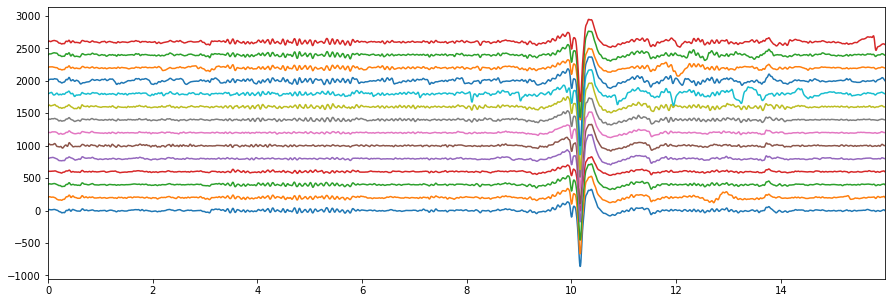

In [5]:
t = np.arange(X.shape[0])/fs
plt.figure(figsize=(15,5))
plt.plot(t, Xf + np.arange(14)*200)
plt.xlim([0,t[-1]])
plt.show()

# Dispersion Entropy

In [6]:
sp.dispersion_entropy

<function core.infomation_theory_advance.dispersion_entropy(x, classes=10, scale=1, emb_dim=2, delay=1, mapping_type='cdf', de_normalize=False, A=100, Mu=100, return_all=False, warns=True)>

In [7]:
Xi = Xf[:,0].copy() # only one channel

## embeding diamension =2

In [11]:
de,prob,patterns_dict,_,_= sp.dispersion_entropy(Xi,classes=10, scale=1, emb_dim=2, delay=1,return_all=True)
de

2.271749287746759

### Probability of all the patterns found

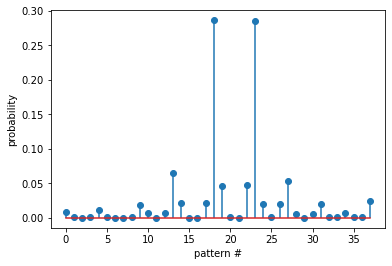

In [14]:
plt.stem(prob)
plt.xlabel('pattern #')
plt.ylabel('probability')
plt.show()

### Pattern dictionary

In [13]:
patterns_dict

{(1, 1): 18,
 (1, 2): 2,
 (1, 4): 1,
 (2, 1): 2,
 (2, 2): 23,
 (2, 3): 2,
 (2, 5): 1,
 (3, 1): 1,
 (3, 2): 2,
 (3, 3): 37,
 (3, 4): 14,
 (4, 2): 1,
 (4, 3): 14,
 (4, 4): 133,
 (4, 5): 44,
 (4, 9): 1,
 (5, 3): 1,
 (5, 4): 44,
 (5, 5): 586,
 (5, 6): 95,
 (5, 7): 2,
 (5, 8): 1,
 (6, 5): 97,
 (6, 6): 585,
 (6, 7): 41,
 (7, 5): 2,
 (7, 6): 42,
 (7, 7): 110,
 (7, 8): 12,
 (8, 4): 1,
 (8, 7): 13,
 (8, 8): 42,
 (8, 9): 3,
 (9, 8): 4,
 (9, 9): 14,
 (9, 10): 3,
 (10, 9): 3,
 (10, 10): 50}

### top 10 patterns

In [22]:
PP = np.array([list(k)+[patterns_dict[k]] for k in patterns_dict])
idx = np.argsort(PP[:,-1])[::-1]
PP[idx[:10],:-1]

array([[ 5,  5],
       [ 6,  6],
       [ 4,  4],
       [ 7,  7],
       [ 6,  5],
       [ 5,  6],
       [10, 10],
       [ 4,  5],
       [ 5,  4],
       [ 8,  8]], dtype=int64)

## embedding diamension 4

In [23]:
de,prob,patterns_dict,_,_= sp.dispersion_entropy(Xi,classes=20, scale=1, emb_dim=4, delay=1,return_all=True)
de

4.866373893367994

In [24]:
PP = np.array([list(k)+[patterns_dict[k]] for k in patterns_dict])
idx = np.argsort(PP[:,-1])[::-1]
PP[idx[:10],:-1]

array([[10, 10, 10, 10],
       [11, 11, 11, 11],
       [12, 12, 12, 12],
       [ 9,  9,  9,  9],
       [11, 11, 10, 10],
       [10, 10, 11, 11],
       [11, 11, 11, 10],
       [10, 10, 10, 11],
       [10, 11, 11, 11],
       [11, 10, 10, 10]], dtype=int64)

### top-10, non-constant pattern

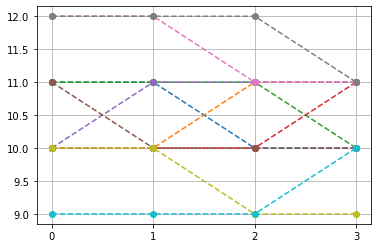

In [27]:
Ptop = np.array(list(PP[idx,:-1]))
idx2 = np.where(np.sum(np.abs(Ptop-Ptop.mean(1)[:,None]),1)>0)[0]
plt.plot(Ptop[idx2[:10]].T,'--o')
plt.xticks([0,1,2,3])
plt.grid()
plt.show()

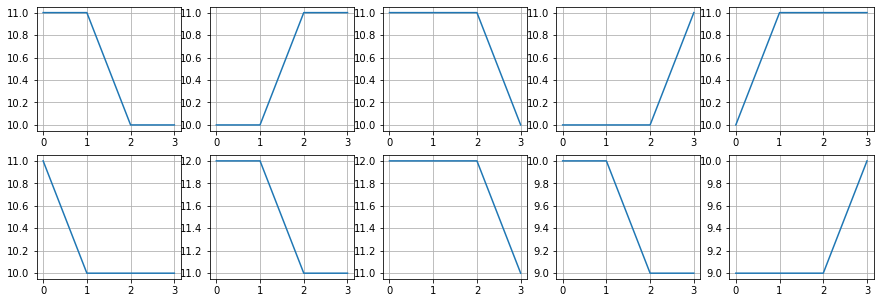

In [28]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(Ptop[idx2[i]])
    plt.grid()
    #plt.yticks([])

# Dispersion Entropy with sliding window

In [29]:
de_temporal = []
win = np.arange(128)
while win[-1]<Xi.shape[0]:
    de,_ = sp.dispersion_entropy(Xi[win],classes=10, scale=1, emb_dim=2, delay=1,return_all=False)
    win+=16
    de_temporal.append(de)

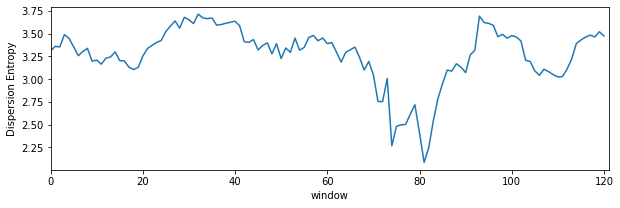

In [31]:
plt.figure(figsize=(10,3))
plt.plot(de_temporal)
plt.xlim([0,len(de_temporal)])
plt.xlabel('window')
plt.ylabel('Dispersion Entropy')
plt.show()

# Dispersion Entropy multiscale

In [32]:
for scl in [1,2,3,5,10,20,30]:
    de,_ = sp.dispersion_entropy(Xi,classes=10, scale=scl, emb_dim=2, delay=1,return_all=False)
    print(f'Sacle: {scl}, \t: DE: {de}')

Sacle: 1, 	: DE: 2.271749287746759
Sacle: 2, 	: DE: 2.5456280627759336
Sacle: 3, 	: DE: 2.6984938704051236
Sacle: 5, 	: DE: 2.682837351130069
Sacle: 10, 	: DE: 2.5585556625642476
Sacle: 20, 	: DE: 2.7480275694000103
Sacle: 30, 	: DE: 2.4767472897625806


# Dispersion Entropy multiscale-refined

In [33]:
de,_ = sp.dispersion_entropy_multiscale_refined(Xi,classes=10, scales=[1, 2, 3, 4, 5], emb_dim=2, delay=1)
de

2.543855087400606

# Documentation

In [34]:
help(sp.dispersion_entropy)

Help on function dispersion_entropy in module core.infomation_theory_advance:

dispersion_entropy(x, classes=10, scale=1, emb_dim=2, delay=1, mapping_type='cdf', de_normalize=False, A=100, Mu=100, return_all=False, warns=True)
    Calculate dispersion entropy of signal x (multiscale)
    ----------------------------------------
    input:
    -----
    x      : input signal x - 1d-array of shape=(n,)
    classes: number of classes - (levels of quantization of amplitude) (default=10)
    emb_dim: embedding dimension,
    delay  : time delay (default=1)
    scale  : downsampled signal with low resolution  (default=1)  - for multipscale dispersion entropy
    mapping_type: mapping method to discretizing signal (default='cdf')
           : options = {'cdf','a-law','mu-law','fd'}
    A  : factor for A-Law- if mapping_type = 'a-law'
    Mu : factor for μ-Law- if mapping_type = 'mu-law'
    
    de_normalize: (bool) if to normalize the entropy, to make it comparable with different signal with

In [35]:
help(sp.dispersion_entropy_multiscale_refined)

Help on function dispersion_entropy_multiscale_refined in module core.infomation_theory_advance:

dispersion_entropy_multiscale_refined(x, classes=10, scales=[1, 2, 3, 4, 5], emb_dim=2, delay=1, mapping_type='cdf', de_normalize=False, A=100, Mu=100, return_all=False, warns=True)
    Calculate multiscale refined dispersion entropy of signal x
    -----------------------------------------------------------
    
    compute dispersion entropy at different scales (defined by argument - 'scales') and combining the patterns
    found at different scales to compute final dispersion entropy
    
    input:
    -----
    x       : input signal x - 1d-array of shape=(n,)
    classes : number of classes - (levels of quantization of amplitude) (default=10)
    emb_dim : embedding dimension,
    delay   : time delay (default=1)
    scales  : list or 1d array of scales to be considered to refine the dispersion entropy
    
    mapping_type: mapping method to discretizing signal (default='cdf')
     